<a href="https://colab.research.google.com/github/maelleal/TCC_Recomendacao_INE/blob/main/TabularClassificationAREA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U fastai
from fastai.tabular import *
from fastai.tabular.all import *
import pandas as pd
import numpy as np
import pathlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = pathlib.Path('/content/drive/My Drive/TCC - Sistema recomendação INE')
df = pd.read_excel(path/'tabela_modelo_medias_v5.xlsx')
df = df.drop(columns=['ID_UFSC', 'MATRICULA', 'COD_AREA', 'MEDIA_NOTA'])

df.head(n=4)

,CURSO,AREA,ORIENTADOR,CLASSIF_AREA,Area1,Area2,Area3,Area4,Area5,Area6,Area7,Area8,Area9,Area10,Area11,Area12,Area13
0,SISTEMAS DE INFORMAÇÃO (noturno),AREA DEFAULT,ORIENTADOR DEFAULT,DISCIPLINA DEFAULT,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.0,1.0
1,CIÊNCIAS DA COMPUTAÇÃO,"Ciência, Tecnologia, Sociedade e Emprendedorismo",Joao Candido Lima Dovicchi,"INE5655 - Gestão Estratégica de Tecnologia, Informação e Comunicação",8.84,0.00,7.67,7.67,6.25,8.50,6.00,6.75,0.00,7.0,7.00,7.5,8.0
2,SISTEMAS DE INFORMAÇÃO (noturno),"Ciência, Tecnologia, Sociedade e Emprendedorismo",José Eduardo de Lucca,INE5428 - Informática e Sociedade,7.30,6.75,6.00,6.50,6.50,8.25,8.00,7.50,7.67,6.5,6.63,0.0,0.0
3,SISTEMAS DE INFORMAÇÃO (noturno),"Ciência, Tecnologia, Sociedade e Emprendedorismo",José Eduardo de Lucca,INE5428 - Informática e Sociedade,8.00,7.34,8.00,7.50,7.50,7.25,9.75,8.38,8.17,6.5,7.59,0.0,0.0


In [4]:
#The list of categorical features in the dataset
cat_names = ['CURSO', 'ORIENTADOR', 'AREA', 'CLASSIF_AREA'] 

#The list of continuous features in the dataset
#Exclude the Dependent variable 'AREA'
cont_names =['Area1', 'Area2', 'Area3', 'Area4', 'Area5', 'Area6', 'Area7', 'Area8', 'Area9', 'Area10', 'Area11', 'Area12', 'Area13'] 


In [5]:
cat = Categorify()

In [6]:
to = TabularPandas(df, cat, cat_names)

In [7]:
cats = to.procs.categorify

In [8]:
norm = Normalize()

In [9]:
to = TabularPandas(df, norm, cont_names=cont_names, cat_names=cat_names)

In [10]:
norms = to.procs.normalize

In [11]:
to.conts.head()

,Area1,Area2,Area3,Area4,Area5,Area6,Area7,Area8,Area9,Area10,Area11,Area12,Area13
0,-6.762219,-4.065492,-5.982622,-6.374544,-6.157860,-5.383018,-5.084287,-4.927196,-4.313026,-5.767669,-5.922481,-1.185653,-0.766876
1,0.747274,-4.733466,0.042741,-0.056253,-0.833175,0.806554,-1.200503,-0.618888,-4.922992,-0.200845,-0.175148,0.686107,1.063734
2,-0.727805,-0.224646,-1.465858,-1.164559,-0.579619,0.600235,0.353010,-0.056935,-0.244558,-0.664747,-0.529567,-1.473616,-1.028392
3,-0.057315,0.169458,0.340848,-0.217289,0.434607,-0.225041,1.712334,0.602424,0.060424,-0.664747,0.390007,-1.473616,-1.028392
4,-0.727805,1.171418,0.340848,0.256346,-1.086732,0.187597,1.906524,0.505018,0.164118,0.495008,0.466638,-1.473616,-1.028392


In [12]:
fm = FillMissing(fill_strategy=FillStrategy.median)

In [13]:
to = TabularPandas(df, fm, cont_names=cont_names)

In [14]:
to.cat_names

(#0) []

In [15]:
cats['AREA']

['#na#', 'AREA DEFAULT', 'Ciência, Tecnologia, Sociedade e Emprendedorismo', 'Engenharia de Software, Gerência de Projetos', 'Fundamentos Matemáticos', 'Fundamentos de Programação', 'Organização de Computadores e Sistemas Embarcados', 'Probabilidade e Estatística', 'Redes de Computadores e Segurança', 'Sistemas Operacionais, Concorrência e Paralelismo', 'Teoria da Computação e Linguagens', 'Tratamento e Banco de Dados']

In [16]:
splits = RandomSplitter()(range_of(df))
splits

((#248) [58,182,235,205,84,278,226,99,239,71...],
 (#61) [81,195,291,72,46,196,79,17,15,214...])

In [17]:
range_of(df)[:5], len(df)

([0, 1, 2, 3, 4], 309)

In [18]:
cat_names = ['CURSO', 'ORIENTADOR', 'CLASSIF_AREA'] 
cont_names = ['Area1', 'Area2', 'Area3', 'Area4', 'Area5', 'Area6', 
              'Area7', 'Area8', 'Area9', 'Area10', 'Area11', 'Area12', 'Area13'] 
procs = [Categorify, FillMissing, Normalize]
y_names = 'AREA'
y_block = CategoryBlock()

In [19]:
to = TabularPandas(df, procs=procs, cat_names=cat_names, cont_names=cont_names,
                   y_names=y_names, y_block=y_block, splits=splits)

In [20]:
dls = to.dataloaders()

In [21]:
trn_dl = TabDataLoader(to.train, bs=64, shuffle=True, drop_last=True)
val_dl = TabDataLoader(to.valid, bs=128)

In [22]:
dls = DataLoaders(trn_dl, val_dl)

In [23]:
dls.show_batch()

,CURSO,ORIENTADOR,CLASSIF_AREA,Area1,Area2,Area3,Area4,Area5,Area6,Area7,Area8,Area9,Area10,Area11,Area12,Area13,AREA
0,SISTEMAS DE INFORMAÇÃO (noturno),Jean Carlo Rossa Hauck,INE5681 - Modelagem e Automação de Processos de Negócios,7.20,7.84,7.00,7.50,6.50,6.50,7.67,6.34,7.50,7.17,7.09,-1.565468e-07,-4.693868e-08,"Engenharia de Software, Gerência de Projetos"
1,CIÊNCIAS DA COMPUTAÇÃO,Jean Everson Martina,INE5619 - Administração e Gerência de Redes de Computadores,8.50,7.00,7.50,8.63,7.67,9.50,7.00,7.50,9.25,7.34,7.00,7.340000e+00,7.500000e+00,Redes de Computadores e Segurança
2,SISTEMAS DE INFORMAÇÃO (noturno),Frank Augusto Siqueira,INE5608 - Análise e Projeto de Sistemas,8.25,7.50,7.00,7.00,6.50,6.50,6.25,10.00,6.90,7.00,6.00,6.670000e+00,-4.693868e-08,"Engenharia de Software, Gerência de Projetos"
3,CIÊNCIAS DA COMPUTAÇÃO,Carina Friedrich Dorneles,INE5454 - Tópicos Especiais em Gerência de Dados,8.25,7.50,7.38,8.84,8.00,9.50,7.25,8.50,9.13,7.67,7.50,8.090000e+00,8.380000e+00,Tratamento e Banco de Dados
4,SISTEMAS DE INFORMAÇÃO (noturno),Jean Everson Martina,INE5429 - Segurança em Computação,7.25,7.00,10.00,8.50,6.50,7.50,9.75,8.00,7.67,6.67,7.09,-1.565468e-07,-4.693868e-08,Redes de Computadores e Segurança
5,CIÊNCIAS DA COMPUTAÇÃO,Vania Bogorny,INE5644 - Data Mining,8.25,7.50,7.00,7.67,8.00,8.50,7.50,7.00,7.13,6.67,7.50,7.250000e+00,7.130000e+00,Tratamento e Banco de Dados
6,CIÊNCIAS DA COMPUTAÇÃO,Ricardo Felipe Custódio,INE5429 - Segurança em Computação,6.75,7.00,6.67,7.67,7.13,9.00,7.50,6.75,9.25,6.67,6.88,7.400000e+00,6.840000e+00,Redes de Computadores e Segurança
7,CIÊNCIAS DA COMPUTAÇÃO,Raul Sidnei Wazlawick,INE5614 - Engenharia de Software,9.25,7.50,8.13,8.50,6.84,6.00,7.50,6.50,8.17,6.67,7.25,6.800000e+00,7.500000e+00,"Engenharia de Software, Gerência de Projetos"
8,SISTEMAS DE INFORMAÇÃO (noturno),#na#,INE5644 - Data Mining,8.50,7.60,7.84,8.50,8.00,6.50,6.50,9.00,7.25,7.84,6.75,7.090000e+00,-4.693868e-08,Tratamento e Banco de Dados
9,CIÊNCIAS DA COMPUTAÇÃO,Renato Fileto,"INE5650 - Web Semântica, Ontologias e Sistemas de Informação",8.25,6.00,6.80,6.63,6.50,7.25,6.50,6.00,9.00,7.17,7.88,7.200000e+00,6.400000e+00,Tratamento e Banco de Dados


In [24]:
to._dbunch_type == dls._dbunch_type

True

In [25]:
emb_szs = get_emb_sz(to); emb_szs

[(3, 3), (36, 12), (39, 12)]

In [26]:
to.cat_names

(#3) ['CURSO','ORIENTADOR','CLASSIF_AREA']

In [27]:
to['AREA'].nunique()

11

In [28]:
cont_len = len(to.cont_names); cont_len

13

In [29]:
batch = dls.one_batch(); len(batch)

3

In [30]:
batch[0][0], batch[1][0]

(tensor([ 2, 15, 13]),
 tensor([-0.4957,  0.3742,  0.7274,  0.7454, -1.0268,  0.3740,  0.9539,  0.4321,
         -0.0369, -0.2847, -0.0679, -1.4609, -1.0254]))

In [31]:
net = TabularModel(emb_szs, cont_len, 10, [200,100])

In [32]:
net

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 3)
    (1): Embedding(36, 12)
    (2): Embedding(39, 12)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=40, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=10, bias=True)
    )
  )
)

In [33]:
learn = tabular_learner(dls, [200,100], metrics=accuracy)

SuggestedLRs(valley=0.001737800776027143)

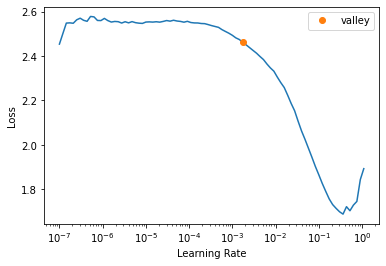

In [34]:
learn.lr_find()

In [35]:
dls = to.dataloaders()
learn = tabular_learner(dls, [200,100], metrics=accuracy)


In [42]:
learn.fit(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.007995,0.725165,0.819672,00:00
1,0.010325,0.714480,0.819672,00:00
2,0.009294,0.717439,0.819672,00:00
3,0.008914,0.727555,0.819672,00:00
4,0.008176,0.717966,0.819672,00:00
5,0.008080,0.717007,0.819672,00:00
6,0.007824,0.716961,0.819672,00:00
7,0.007543,0.716562,0.819672,00:00
8,0.007261,0.709829,0.819672,00:00
9,0.007478,0.706748,0.819672,00:00


In [37]:
# predição em lote
dl = learn.dls.test_dl(df.iloc[:100])

In [38]:
dl.show_batch()

,CURSO,ORIENTADOR,CLASSIF_AREA,Area1,Area2,Area3,Area4,Area5,Area6,Area7,Area8,Area9,Area10,Area11,Area12,Area13,AREA
0,SISTEMAS DE INFORMAÇÃO (noturno),ORIENTADOR DEFAULT,DISCIPLINA DEFAULT,1.00,1.000000e+00,1.00,1.00,1.00,1.00,1.00,1.00,1.000000e+00,1.00,1.00,1.000000e+00,1.000000e+00,AREA DEFAULT
1,CIÊNCIAS DA COMPUTAÇÃO,Joao Candido Lima Dovicchi,"INE5655 - Gestão Estratégica de Tecnologia, Informação e Comunicação",8.84,9.845508e-09,7.67,7.67,6.25,8.50,6.00,6.75,-1.555664e-07,7.00,7.00,7.500000e+00,8.000000e+00,"Ciência, Tecnologia, Sociedade e Emprendedorismo"
2,SISTEMAS DE INFORMAÇÃO (noturno),José Eduardo de Lucca,INE5428 - Informática e Sociedade,7.30,6.750000e+00,6.00,6.50,6.50,8.25,8.00,7.50,7.670000e+00,6.50,6.63,-1.565468e-07,-4.693868e-08,"Ciência, Tecnologia, Sociedade e Emprendedorismo"
3,SISTEMAS DE INFORMAÇÃO (noturno),José Eduardo de Lucca,INE5428 - Informática e Sociedade,8.00,7.340000e+00,8.00,7.50,7.50,7.25,9.75,8.38,8.170000e+00,6.50,7.59,-1.565468e-07,-4.693868e-08,"Ciência, Tecnologia, Sociedade e Emprendedorismo"
4,SISTEMAS DE INFORMAÇÃO (noturno),José Eduardo de Lucca,#na#,7.30,8.840000e+00,8.00,8.00,6.00,7.75,10.00,8.25,8.340000e+00,7.75,7.67,-1.565468e-07,-4.693868e-08,"Ciência, Tecnologia, Sociedade e Emprendedorismo"
5,SISTEMAS DE INFORMAÇÃO (noturno),José Eduardo de Lucca,INE5428 - Informática e Sociedade,7.70,7.670000e+00,7.50,7.50,8.50,6.75,8.50,6.84,8.000000e+00,6.50,7.59,-1.565468e-07,-4.693868e-08,"Ciência, Tecnologia, Sociedade e Emprendedorismo"
6,SISTEMAS DE INFORMAÇÃO (noturno),José Eduardo de Lucca,INE5428 - Informática e Sociedade,7.60,7.840000e+00,8.00,7.00,6.00,6.50,9.00,7.13,8.000000e+00,7.00,7.30,-1.565468e-07,-4.693868e-08,"Ciência, Tecnologia, Sociedade e Emprendedorismo"
7,SISTEMAS DE INFORMAÇÃO (noturno),Joao Candido Lima Dovicchi,"INE5655 - Gestão Estratégica de Tecnologia, Informação e Comunicação",8.20,7.670000e+00,6.25,7.00,9.00,7.34,9.50,8.84,8.000000e+00,6.75,7.84,-1.565468e-07,-4.693868e-08,"Ciência, Tecnologia, Sociedade e Emprendedorismo"
8,SISTEMAS DE INFORMAÇÃO (noturno),#na#,INE5428 - Informática e Sociedade,7.50,7.200000e+00,7.42,7.50,6.50,6.50,6.25,8.40,6.750000e+00,7.50,6.25,7.750000e+00,-4.693868e-08,"Ciência, Tecnologia, Sociedade e Emprendedorismo"
9,CIÊNCIAS DA COMPUTAÇÃO,Jean Everson Martina,INE5429 - Segurança em Computação,8.50,7.500000e+00,7.25,7.00,6.84,6.00,7.00,6.75,8.750000e+00,6.84,6.63,7.000000e+00,6.840000e+00,"Ciência, Tecnologia, Sociedade e Emprendedorismo"


In [39]:
learn.validate(dl=dl)

(#2) [0.0609070286154747,0.9800000190734863]

In [40]:
learn.export('modeloParaPredicao.pk1')